In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn

In [3]:
df = pd.read_csv('/content/youtube_channel_data.csv')

In [4]:
df.head()

,VideoID,Title,UploadDate,Views,Likes,Dislikes,Comments
0,3UMBcd3TyhQ,What is SEO (Search Engine Optimization) & How...,2015-08-22 14:25:10+00:00,419504,3713,NaN,295
1,8RvAdYyvtcM,SEO Tutorial - What is Search Engine Working |...,2015-09-06 13:50:41+00:00,147843,1061,NaN,76
2,O6RZPzYxMls,"TYPES OF SEO: White Hat, Grey Hat & Black Hat ...",2015-09-19 08:25:17+00:00,127662,1082,NaN,48
3,nmX-C9emvEs,On-Page SEO: Big Guide to On-Page Optimization...,2015-09-19 10:38:26+00:00,248356,2389,NaN,256
4,2IXS-B_Zafk,Google Keyword Planner Tutorial - What is Keyw...,2015-09-25 19:01:11+00:00,135444,1429,NaN,310


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5654 entries, 0 to 5653
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VideoID     5654 non-null   object 
 1   Title       5654 non-null   object 
 2   UploadDate  5654 non-null   object 
 3   Views       5654 non-null   int64  
 4   Likes       5654 non-null   int64  
 5   Dislikes    0 non-null      float64
 6   Comments    5654 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 309.3+ KB


In [ ]:
df.describe()

,Views,Likes,Dislikes,Comments
count,5.654000e+03,5654.000000,0.0,5654.000000
mean,6.683466e+04,1577.990803,NaN,45.169261
std,4.033885e+05,10739.938049,NaN,198.217977
min,1.050000e+02,4.000000,NaN,0.000000
25%,5.868000e+03,143.000000,NaN,6.000000
50%,1.537600e+04,372.000000,NaN,15.000000
75%,4.391050e+04,929.000000,NaN,34.000000
max,2.254503e+07,587547.000000,NaN,7414.000000


In [ ]:
df.value_counts()

,,,,,,,count
VideoID,Title,UploadDate,Views,Likes,Dislikes,Comments,


In [ ]:
df.count()

,0
VideoID,5654
Title,5654
UploadDate,5654
Views,5654
Likes,5654
Dislikes,0
Comments,5654


In [ ]:
df.isnull().sum()

,0
VideoID,0
Title,0
UploadDate,0
Views,0
Likes,0
Dislikes,5654
Comments,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
VideoID,0
Title,0
UploadDate,0
Views,0
Likes,0
Dislikes,0
Comments,0


**Average views, likes, dislikes, comments**

In [5]:
df[['Views','Likes','Dislikes','Comments']].mean()


,0
Views,66834.662363
Likes,1577.990803
Dislikes,NaN
Comments,45.169261


**Top 10 most viewed videos**

In [6]:
df.nlargest(10, 'Views')

,VideoID,Title,UploadDate,Views,Likes,Dislikes,Comments
2757,Rgvzt0D8bR4,Ethical HACKING Full Course in 10 HOURS (Begin...,2021-08-29 11:12:36+00:00,22545031,587547,NaN,7414
3287,4fQ_CyEmQnM,How to Secure Your Home Wi-Fi Network from Hac...,2022-02-25 14:30:02+00:00,7821987,225761,NaN,1863
2862,sCOw5y1RQpY,PYTHON Full Course for Beginners in 16 Hour (w...,2021-11-01 13:30:15+00:00,7403513,175191,NaN,2530
4937,VaSjiJMrq24,Data Analytics FULL Course for Beginners to Pr...,2024-01-07 13:30:10+00:00,6527854,186867,NaN,5064
3215,UIpor63v-w8,YouTube Full Course [FREE] | How to Grow Your ...,2022-02-05 12:30:17+00:00,5645186,188577,NaN,6649
1491,G6DmDqYLWL8,DIGITAL MARKETING Full Course for Beginners in...,2020-12-19 14:00:03+00:00,5169141,137820,NaN,2016
2826,qvQie2QP5Vg,Adobe Photoshop Course for Beginners [12 Hours...,2021-10-05 13:30:08+00:00,4428254,153825,NaN,1686
3329,kYcFXYVZiBQ,Wi-Fi Networking 💀: Penetration and Security o...,2022-03-06 12:30:15+00:00,4379399,83588,NaN,1043
4428,HVjjoMvutj4,"Full Stack ""Web Development"" Full Course - in ...",2023-01-01 13:30:04+00:00,3093666,84695,NaN,1642
4030,yWJp7gQqCQ8,Canva Tutorial For Beginners | How to Use Canv...,2022-08-22 14:00:35+00:00,2885900,62058,NaN,2748


**Views vs Likes correlation**

In [8]:
df['Views'].corr(df['Likes'])

np.float64(0.9864304028994513)

**DATE-BASED ANALYSIS**

In [9]:
pd.to_datetime(df['UploadDate'])

,UploadDate
0,2015-08-22 14:25:10+00:00
1,2015-09-06 13:50:41+00:00
2,2015-09-19 08:25:17+00:00
3,2015-09-19 10:38:26+00:00
4,2015-09-25 19:01:11+00:00
...,...
5649,2025-07-24 14:31:01+00:00
5650,2025-07-25 03:30:38+00:00
5651,2025-07-25 14:32:22+00:00
5652,2025-07-26 13:30:17+00:00


**Lowest liked video**

In [11]:
df.loc[df['Likes'].idxmin()]

,1706
VideoID,Azwb6Los4lE
Title,Boundary Command in AutoCad | How to Use Bound...
UploadDate,2021-02-05 02:30:01+00:00
Views,172
Likes,4
Dislikes,NaN
Comments,1


**Most viewed video**

In [12]:
df.loc[df['Views'].idxmax()]

,2757
VideoID,Rgvzt0D8bR4
Title,Ethical HACKING Full Course in 10 HOURS (Begin...
UploadDate,2021-08-29 11:12:36+00:00
Views,22545031
Likes,587547
Dislikes,NaN
Comments,7414


**Views vs Likes (scatter plot)**

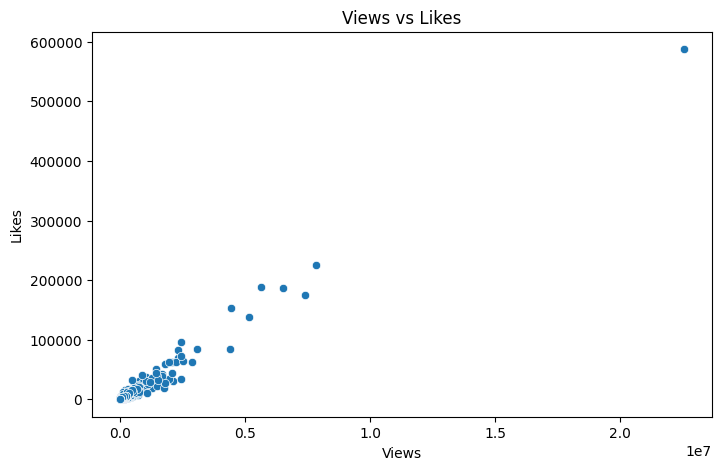

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Views', y='Likes', data=df)
plt.title("Views vs Likes")
plt.show()

** Likes vs Comments (scatter plot)**

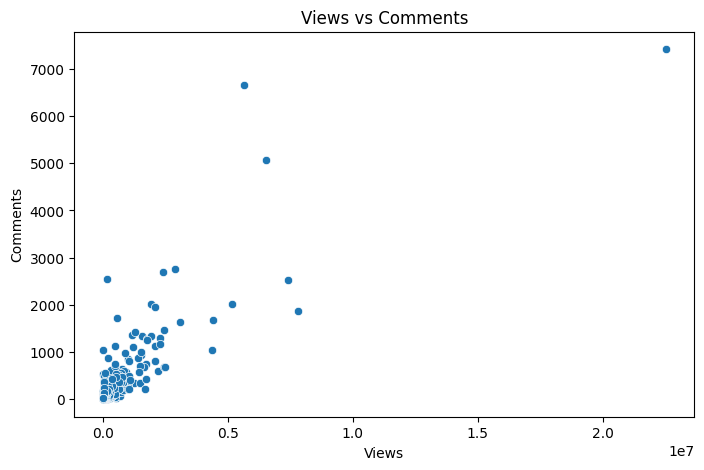

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Views', y='Comments', data=df)
plt.title("Views vs Comments")
plt.show()


**Engagement Rate Distribution**

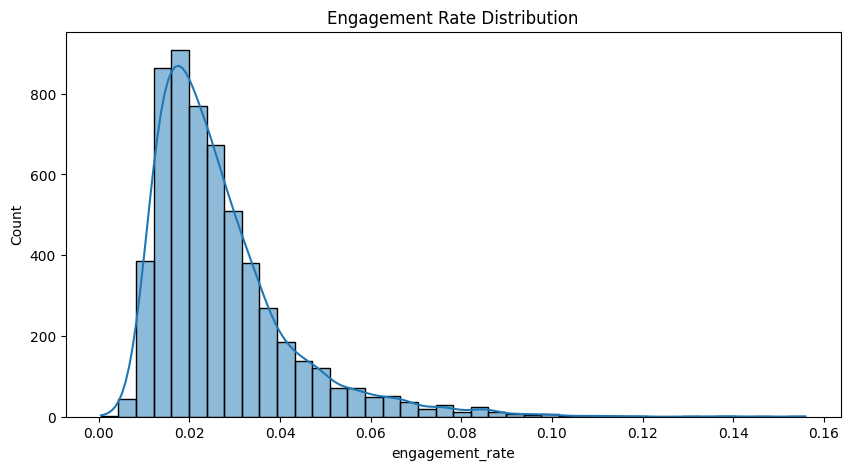

In [16]:
df['engagement_rate'] = (df['Likes'] + df['Comments']) / df['Views']

plt.figure(figsize=(10,5))
sns.histplot(df['engagement_rate'], bins=40, kde=True)
plt.title("Engagement Rate Distribution")
plt.show()


**Like–Dislike Ratio Chart**

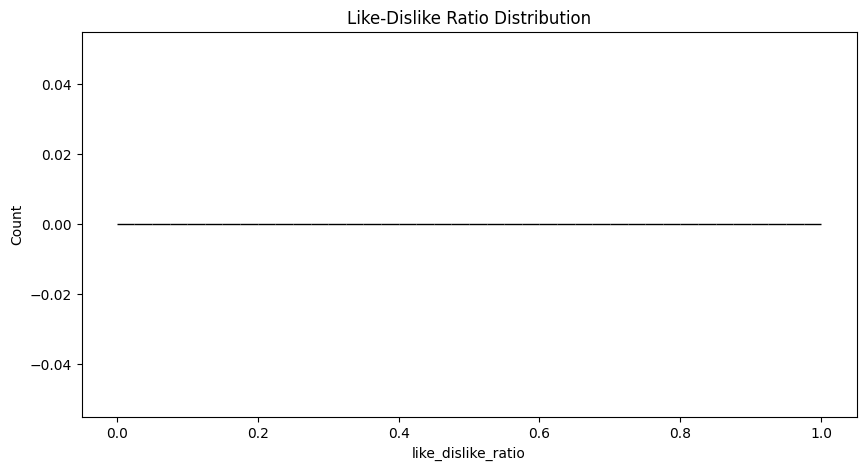

In [17]:
df['like_dislike_ratio'] = df['Likes'] / (df['Dislikes'] + 1)

plt.figure(figsize=(10,5))
sns.histplot(df['like_dislike_ratio'], bins=40, kde=True)
plt.title("Like-Dislike Ratio Distribution")
plt.show()
